In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import numpy as np    
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

import seaborn as sns

In [2]:
import os 
os.chdir('/Users/corbettcarrel/OneDrive/Data Science/Breast Cancer')

In [3]:
df_cancer = pd.read_csv('data.csv')
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
# data cleaning

# removing unessaracy variables
df_cancer.drop('Unnamed: 32', axis = 1, inplace = True)
df_cancer.drop('id', axis = 1, inplace = True)

# coverting diagnosis to binary int and droping diagnosis
df_cancerous = df_cancer['diagnosis'] == 'M'
df_cancerous.astype('int64', copy=False)
df_cancer['iscancerous'] = df_cancerous
df_cancer['iscancerous'] = df_cancer['iscancerous'].astype('int64')
df_cancer.drop('diagnosis', axis = 1, inplace = True)

# rearranging columns so iscancerous is first
df_cancer = df_cancer[['iscancerous', 
                       'radius_mean', 
                       'texture_mean', 
                       'perimeter_mean', 
                       'area_mean',
                       'smoothness_mean', 
                       'compactness_mean', 
                       'concavity_mean',
                       'concave points_mean', 
                       'symmetry_mean', 
                       'fractal_dimension_mean',
                       'radius_se', 
                       'texture_se', 
                       'perimeter_se', 
                       'area_se', 
                       'smoothness_se',
                       'compactness_se', 
                       'concavity_se', 
                       'concave points_se', 
                       'symmetry_se',
                       'fractal_dimension_se', 
                       'radius_worst', 
                       'texture_worst',
                       'perimeter_worst', 
                       'area_worst', 
                       'smoothness_worst',
                       'compactness_worst', 
                       'concavity_worst', 
                       'concave points_worst',
                       'symmetry_worst', 
                       'fractal_dimension_worst']]

# renaming columns for modeling purposes
df_cancer.rename(columns={'concave points_se':'concave_points_se',
                          'concave points_mean':'concave_points_mean',
                          'concave points_worst':'concave_points_worst'}, inplace = True)

df_cancer.head()

,iscancerous,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df_cancer.describe()

,iscancerous,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# creating new frame of variables with high corr to iscancerous
df_corr = df_cancer.corr()
df_corr = df_corr.iloc[:,0:1]
skim_df = df_corr.sort_values(by=['iscancerous'] , ascending = False) 
mask = skim_df['iscancerous'] > .50
df_mask = skim_df[mask]
nam_list = list(df_mask.index)
df_sig = df_cancer[nam_list]
df_sig.corr()

,iscancerous,concave_points_worst,perimeter_worst,concave_points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se
iscancerous,1.000000,0.793566,0.782914,0.776614,0.776454,0.742636,0.733825,0.730029,0.708984,0.696360,0.659610,0.596534,0.590998,0.567134,0.556141,0.548236
concave_points_worst,0.793566,1.000000,0.816322,0.910155,0.787424,0.771241,0.747419,0.744214,0.722017,0.861323,0.855434,0.815573,0.801080,0.531062,0.554897,0.538166
perimeter_worst,0.782914,0.816322,1.000000,0.855923,0.993708,0.970387,0.977578,0.965137,0.959120,0.729565,0.618344,0.590210,0.529408,0.719684,0.721031,0.761213
concave_points_mean,0.776614,0.910155,0.855923,1.000000,0.830318,0.850977,0.809630,0.822529,0.823269,0.921391,0.752399,0.831135,0.667454,0.698050,0.710650,0.690299
radius_worst,0.776454,0.787424,0.993708,0.830318,1.000000,0.969476,0.984015,0.969539,0.962746,0.688236,0.573975,0.535315,0.475820,0.715065,0.697201,0.757373
perimeter_mean,0.742636,0.771241,0.970387,0.850977,0.969476,1.000000,0.941550,0.997855,0.986507,0.716136,0.563879,0.556936,0.455774,0.691765,0.693135,0.744983
area_worst,0.733825,0.747419,0.977578,0.809630,0.984015,0.941550,1.000000,0.941082,0.959213,0.675987,0.543331,0.509604,0.438296,0.751548,0.730713,0.811408
radius_mean,0.730029,0.744214,0.965137,0.822529,0.969539,0.997855,0.941082,1.000000,0.987357,0.676764,0.526911,0.506124,0.413463,0.679090,0.674172,0.735864
area_mean,0.708984,0.722017,0.959120,0.823269,0.962746,0.986507,0.959213,0.987357,1.000000,0.685983,0.512606,0.498502,0.390410,0.732562,0.726628,0.800086
concavity_mean,0.696360,0.861323,0.729565,0.921391,0.688236,0.716136,0.675987,0.676764,0.685983,1.000000,0.884103,0.883121,0.754968,0.631925,0.660391,0.617427


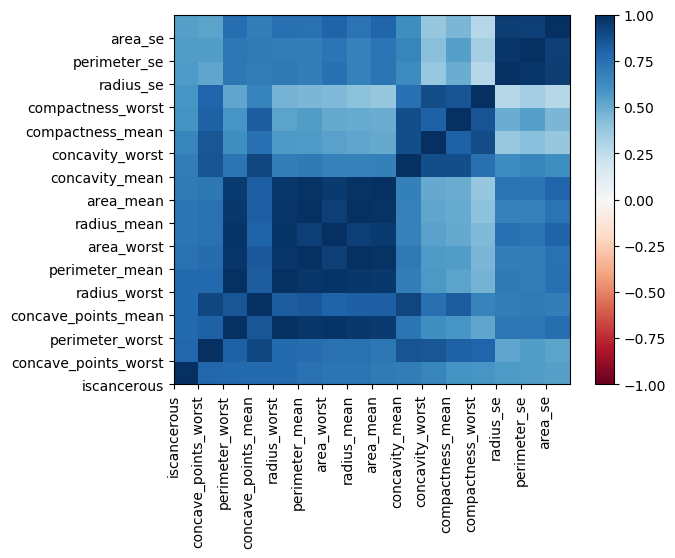

In [8]:
#heatmap
plt.style.use('default')

# select a blue color map and define vmin
heatmap = plt.pcolor(df_sig.corr(), cmap='RdBu', vmin=-1)

# plot the legend on the side
plt.colorbar(heatmap)

# Define the tick marks so that they can be easily read
plt.xticks(np.arange(len(df_sig.columns)), df_sig.columns, rotation='vertical');
plt.yticks(np.arange(len(df_sig.columns)), df_sig.columns, rotation='horizontal');
# plt.title('Correlations in Energy Prediction Dataset')

In [22]:
mask = df_sig['iscancerous'] == 1
df_sig_m = df_sig[mask]
df_sig_m.describe()

,iscancerous,concave_points_worst,perimeter_worst,concave_points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se
count,212.0,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,1.0,0.182237,141.370330,0.087990,21.134811,115.365377,1422.286321,17.462830,978.376415,0.160775,0.450606,0.145188,0.374824,0.609083,4.323929,72.672406
std,0.0,0.046308,29.457055,0.034374,4.283569,21.854653,597.967743,3.203971,367.937978,0.075019,0.181507,0.053987,0.170372,0.345039,2.568546,61.355268
min,1.0,0.028990,85.100000,0.020310,12.840000,71.900000,508.100000,10.950000,361.600000,0.023980,0.023980,0.046050,0.051310,0.193800,1.334000,13.990000
25%,1.0,0.152750,119.325000,0.064620,17.730000,98.745000,970.300000,15.075000,705.300000,0.109525,0.326425,0.109600,0.244475,0.390375,2.715500,35.762500
50%,1.0,0.182000,138.000000,0.086280,20.590000,114.200000,1303.000000,17.325000,932.000000,0.151350,0.404900,0.132350,0.356350,0.547200,3.679500,58.455000
75%,1.0,0.210675,159.800000,0.103175,23.807500,129.925000,1712.750000,19.590000,1203.750000,0.203050,0.556175,0.172400,0.447850,0.757300,5.206250,94.000000
max,1.0,0.291000,251.200000,0.201200,36.040000,188.500000,4254.000000,28.110000,2501.000000,0.426800,1.170000,0.345400,1.058000,2.873000,21.980000,542.200000


In [23]:
mask = df_sig['iscancerous'] == 0
df_sig_b = df_sig[mask]
df_sig_b.describe()

,iscancerous,concave_points_worst,perimeter_worst,concave_points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se
count,357.0,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,0.0,0.074444,87.005938,0.025717,13.379801,78.075406,558.899440,12.146524,462.790196,0.046058,0.166238,0.080085,0.182673,0.284082,2.000321,21.135148
std,0.0,0.035797,13.527091,0.015909,1.981368,11.807438,163.601424,1.780512,134.287118,0.043442,0.140368,0.033750,0.092180,0.112570,0.771169,8.843472
min,0.0,0.000000,50.410000,0.000000,7.930000,43.790000,185.200000,6.981000,143.500000,0.000000,0.000000,0.019380,0.027290,0.111500,0.757000,6.802000
25%,0.0,0.051040,78.270000,0.015020,12.080000,70.870000,447.100000,11.080000,378.200000,0.020310,0.077080,0.055620,0.112000,0.207300,1.445000,15.260000
50%,0.0,0.074310,86.920000,0.023440,13.350000,78.180000,547.400000,12.200000,458.400000,0.037090,0.141200,0.075290,0.169800,0.257500,1.851000,19.630000
75%,0.0,0.097490,96.590000,0.032510,14.800000,86.100000,670.000000,13.370000,551.100000,0.059990,0.221600,0.097550,0.230200,0.341600,2.388000,25.030000
max,0.0,0.175000,127.100000,0.085340,19.820000,114.600000,1210.000000,17.850000,992.100000,0.410800,1.252000,0.223900,0.584900,0.881100,5.118000,77.110000


In [9]:
from sklearn.model_selection import train_test_split

training_sample2, testing_sample2 = train_test_split(df_cancer, test_size=0.3, random_state=42)

print("Training data set size = ", len(training_sample2))
print("Testing data set size = ", len(testing_sample2))

Training data set size =  398
Testing data set size =  171


In [10]:
train_labels = np.array(training_sample2['iscancerous'])
train_features = training_sample2.drop('iscancerous', axis=1)

training_sample2 = train_features
train_feature_list = list(train_features.columns)

train_features = np.array(train_features)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 400, random_state = 42)

rf.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [11]:
print('Num of classes')
print(rf.n_classes_)
print('--------------------')
print('Class labels')
print(rf.classes_)
print('--------------------')
print('Num of features when fit is perform')
print(rf.n_features_)
print('--------------------')
print('Num of outputs when fit is performed')
print(rf.n_outputs_)
print('--------------------')
print('Feature Importance')
print(rf.feature_importances_)

Num of classes
2
--------------------
Class labels
[0 1]
--------------------
Num of features when fit is perform
30
--------------------
Num of outputs when fit is performed
1
--------------------
Feature Importance
[0.03963287 0.01242505 0.04334412 0.03906534 0.00596256 0.01169508
 0.063181   0.12212357 0.00397413 0.0045961  0.02018819 0.00409821
 0.00946198 0.03940818 0.00505149 0.00543283 0.00678659 0.00486739
 0.00425654 0.00640359 0.07247066 0.01943648 0.10796007 0.12651333
 0.01030692 0.01763695 0.04059611 0.13226854 0.01500546 0.00585069]


In [12]:
from sklearn.model_selection import cross_validate

test_labels = np.array(testing_sample2['iscancerous'])
test_features = testing_sample2.drop('iscancerous', axis=1)

testing_sample2 = test_features
test_feature_list = list(test_features.columns)

test_features = np.array(test_features)

accuracy_rf = cross_validate(rf, test_features, test_labels, cv=10)['test_score']
print('The accuracy is: ',sum(accuracy_rf)/len(accuracy_rf)*100,'%')

The accuracy is:  95.359477124183 %


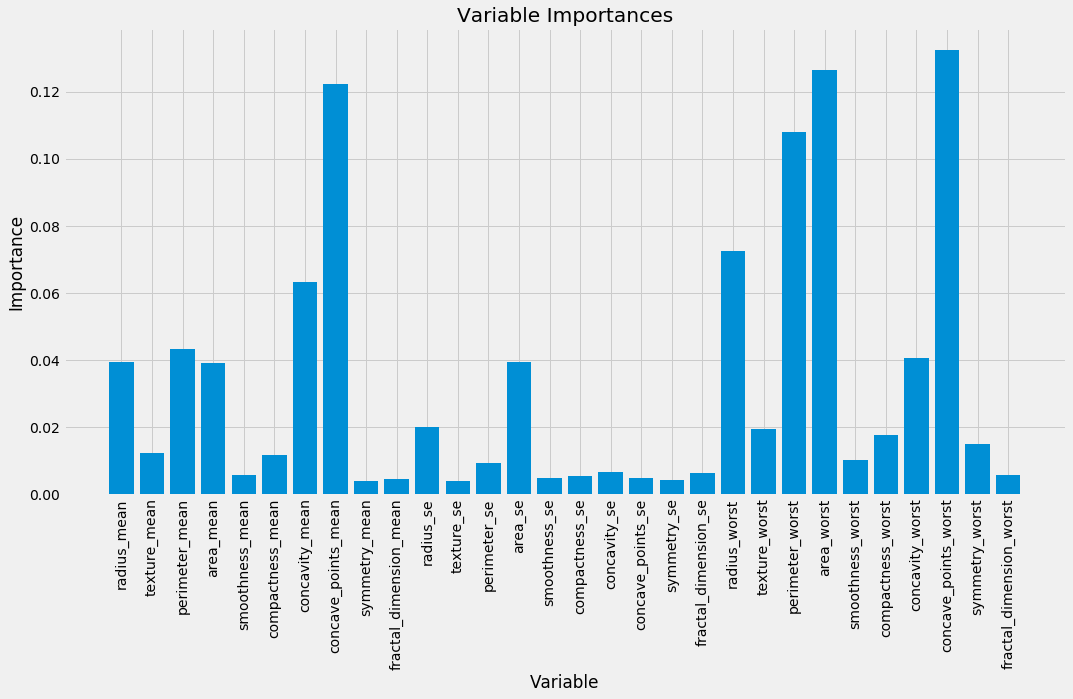

In [13]:
# Get numerical feature importances
import matplotlib.pyplot as plt

%matplotlib inline

importances = list(rf.feature_importances_)

# Set the style
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, train_feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [14]:
importances = pd.Series(rf.feature_importances_)
names = pd.Series(train_feature_list)
import_df = pd.concat([importances, names], axis=1)
skim_df = import_df.sort_values(by=[0] , ascending = False) 
skim_df.reset_index(inplace = True)
del skim_df["index"]
thin_df = skim_df.loc[0:11]
col_list = ['iscancerous']
col_list = col_list + (list(thin_df.loc[:,1]))
df_slim = df_cancer[col_list]
df_slim.corr()

,iscancerous,concave_points_worst,area_worst,concave_points_mean,perimeter_worst,radius_worst,concavity_mean,perimeter_mean,concavity_worst,radius_mean,area_se,area_mean,radius_se
iscancerous,1.000000,0.793566,0.733825,0.776614,0.782914,0.776454,0.696360,0.742636,0.659610,0.730029,0.548236,0.708984,0.567134
concave_points_worst,0.793566,1.000000,0.747419,0.910155,0.816322,0.787424,0.861323,0.771241,0.855434,0.744214,0.538166,0.722017,0.531062
area_worst,0.733825,0.747419,1.000000,0.809630,0.977578,0.984015,0.675987,0.941550,0.543331,0.941082,0.811408,0.959213,0.751548
concave_points_mean,0.776614,0.910155,0.809630,1.000000,0.855923,0.830318,0.921391,0.850977,0.752399,0.822529,0.690299,0.823269,0.698050
perimeter_worst,0.782914,0.816322,0.977578,0.855923,1.000000,0.993708,0.729565,0.970387,0.618344,0.965137,0.761213,0.959120,0.719684
radius_worst,0.776454,0.787424,0.984015,0.830318,0.993708,1.000000,0.688236,0.969476,0.573975,0.969539,0.757373,0.962746,0.715065
concavity_mean,0.696360,0.861323,0.675987,0.921391,0.729565,0.688236,1.000000,0.716136,0.884103,0.676764,0.617427,0.685983,0.631925
perimeter_mean,0.742636,0.771241,0.941550,0.850977,0.970387,0.969476,0.716136,1.000000,0.563879,0.997855,0.744983,0.986507,0.691765
concavity_worst,0.659610,0.855434,0.543331,0.752399,0.618344,0.573975,0.884103,0.563879,1.000000,0.526911,0.385100,0.512606,0.380585
radius_mean,0.730029,0.744214,0.941082,0.822529,0.965137,0.969539,0.676764,0.997855,0.526911,1.000000,0.735864,0.987357,0.679090


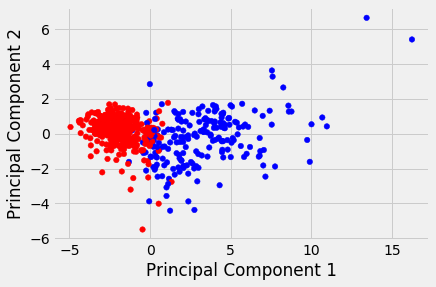

In [30]:
# PCA 
from sklearn.decomposition import PCA 
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

X = df_slim.drop('iscancerous', axis = 1).values
y = df_slim['iscancerous']

X_scale = scale(X)

pca_model = PCA()
X_PCA = pca_model.fit_transform(X_scale)

plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y, cmap=cmap_bold,s=30)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

[8.00646587e-01 1.05126720e-01 5.83225347e-02 1.38426654e-02
 1.09133312e-02 4.67530960e-03 3.86423433e-03 1.09082000e-03
 1.00093927e-03 3.79404107e-04 1.12530508e-04 2.49231813e-05]


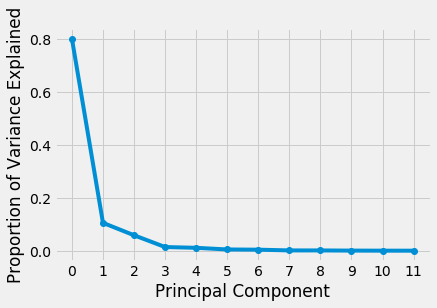

In [31]:
#eval of PCA components
var_ratio = pca_model.explained_variance_ratio_
print(var_ratio)

#creating df with var_ratio
df_pca = pd.DataFrame(X_PCA)

#plotting df_cancer with PCA
plt.plot(var_ratio, '-o')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xticks(range(len(var_ratio)))
plt.show()

In [17]:
#logit models
import statsmodels.formula.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

#splitting into training test
X = df_slim.drop('iscancerous', axis = 1).values
y = df_slim['iscancerous'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#stats modeling
logit_1 = sm.logit(formula="iscancerous~concave_points_worst+area_worst+concave_points_mean+perimeter_worst+radius_worst+concavity_mean+perimeter_mean+concavity_worst+radius_mean+area_se+area_mean+radius_se", 
                   data=df_slim).fit()

logit_1.summary()

Optimization terminated successfully.
         Current function value: 0.091364
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            iscancerous   No. Observations:                  569
Model:                          Logit   Df Residuals:                      556
Method:                           MLE   Df Model:                           12
Date:                Thu, 09 May 2019   Pseudo R-squ.:                  0.8616
Time:                        07:40:01   Log-Likelihood:                -51.986
converged:                       True   LL-Null:                       -375.72
                                        LLR p-value:                7.631e-131
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.6673     13.497      0.272      0.786     -22.787      30.122
concave_points_worst    25.9316     17.749      1.461      0.144      -8.856      60.719
area_worst               0.0101      0.020      0.515      0.606      -0.028       0.048
concave_points_mean     84.3820     40.618      2.077      0.038       4.772     163.992
perimeter_worst          0.0305      0.102      0.299      0.765      -0.169       0.230
radius_worst             0.6966      1.827      0.381      0.703      -2.884       4.278
concavity_mean         -18.7233     18.131     -1.033      0.302     -54.259      16.813
perimeter_mean          -0.4579      0.485     -0.945      0.345      -1.408       0.492
concavity_worst          6.3155      4.493      1.406      0.160      -2.491      15.122
radius_mean             -0.4680      4.513     -0.104      0.917      -9.314       8.377
area_se                  0.2313      0.147      1.576      0.115      -0.056       0.519
area_mean                0.0198      0.032      0.625      0.532      -0.042       0.082
radius_se              -13.8259     12.733     -1.086      0.278     -38.782      11.130
========================================================================================

Possibly complete quasi-separation: A fraction 0.26 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [18]:
#sklearn modeling
model_log = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter = 200) 
model_log.fit(X_train, y_train)
y_pred_log = model_log.predict(X_test)

print(confusion_matrix(y_true = y_test, y_pred = y_pred_log))
print(model_log.score(X_test,y_test))

[[107   1]
 [  2  61]]
0.9824561403508771


In [19]:
# SVM modeling
from sklearn import svm

model_svm = svm.SVC(kernel='linear', C=6)
model_svm.fit(X_train, y_train)    
y_pred_svm = model_svm.predict(X_test)

print(confusion_matrix(y_true = y_test, y_pred = y_pred_svm))
print(model_svm.score(X_test,y_test))

[[108   0]
 [  2  61]]
0.9883040935672515


In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import scale

X_scale = scale(X)

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, random_state=42)

model_mlp = MLPClassifier(hidden_layer_sizes=(100,90,60),
                          solver='adam',  
                          tol=.1, 
                          random_state=1)

model_mlp.fit(X_train, y_train)    
y_pred_mlp = model_mlp.predict(X_test)

print(confusion_matrix(y_true = y_test, y_pred = y_pred_mlp))
print(model_mlp.score(X_test, y_test))

[[104   4]
 [  4  59]]
0.9532163742690059
